In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

In [2]:
# Load the dataset 
data_path = '/Users/ec270266/Documents/Phd/Euclid/dev/feature-sed-pred/sed_spectral_classification/output/psf_dataset/'
# output_path = data_path
train_dataset = np.load(data_path + 'train_12000_stars_id_002_8bins.npy', allow_pickle=True)[()]
test_dataset = np.load(data_path + 'test_1000_stars_id_002_8bins.npy', allow_pickle=True)[()]

In [3]:
# def perform_PCA(N_components, fit_selection, *transform_selection):
#     """Performs PCA decomposition on star sets and returns a PCA star sets.

#     Args:
#         N_components (int): Number of PCA components to do the analysis.
#         fit_selection: Star set (in 32x32 float array format) to do the PCA fit.
#         transform_selection: Variable amount of star sets to do the PCA transform on.
        
#     Returns: 
#         List: Processed PCA star sets.
#     """
#     pca = PCA(n_components= N_components) 
#     pca.fit(fit_selection.reshape(-1, 1024))

#     pca_processed_sets = []
#     for i in range(len(transform_selection)):
#         pca_processed_sets.append(pca.transform(transform_selection[i].reshape(-1, 1024)))

#     return pca_processed_sets

In [4]:
# def SEDlisttoC(SED_list):
#     """Converts a stellar class (1 to 13) to the regression parameter C."""
#     sed_array = np.array(SED_list)
#     return sed_array*0.5 + 1.5

# def CtoSEDarray(c_values, variance):
#     """Converts the regression parameter C back to a stellar class.
#     If the C is out of bounds or its variance is too high it is classified as an anomaly (stellar class 20)."""
#     sed_classes = np.rint(((c_values - 1.5) * 2)).astype(int)
#     sed_classes = np.where((c_values < 1.4) | (c_values > 7.6), 13, sed_classes)
#     sed_classes = np.where((variance > 1.00), 13, sed_classes)
#     return sed_classes

# def calculate_success_rate(confusion_matrix):
#     """Metric that contemplates success as the true spectral class with a tolerance of one adjacent class."""
#     diagonal = np.trace(confusion_matrix)
#     diagonal_neighbors = np.sum(np.diagonal(confusion_matrix, offset=1)) + np.sum(np.diagonal(confusion_matrix, offset=-1))
#     total_classified = np.sum(confusion_matrix)
    
#     success_rate = (diagonal + diagonal_neighbors) / total_classified
#     return success_rate

In [65]:
# rand_runs = 10
# Hyperparameters
N_components = 24

train_stars_offset = 2000
noisy_train_stars = train_dataset['noisy_stars'][train_stars_offset:]
noisy_test_stars = test_dataset['noisy_stars']
train_labels = train_dataset['SED_ids'][train_stars_offset:]
test_labels = test_dataset['SED_ids']


# for run in range(rand_runs):

fit_selection = noisy_train_stars
train_size=len(noisy_train_stars)

pca = PCA(n_components=N_components) 
pca.fit(fit_selection.reshape(-1, 1024))


PCA(n_components=24)

In [161]:
star_components

array([[1., 0., 0., 0., 0., 0., 0., 0.]])

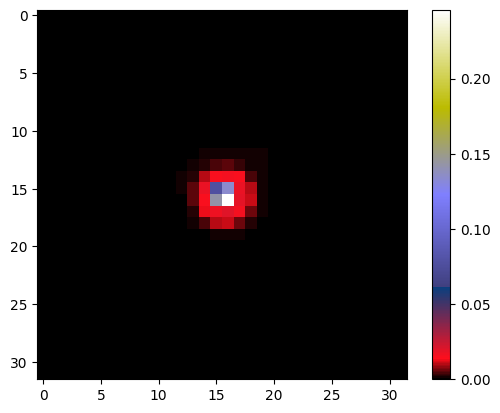

In [204]:
star_components = np.zeros((1,24))
star_components[0, 0] = 0
plt.imshow((pca.inverse_transform(star_components)).reshape(32,32) , cmap='gist_stern')
plt.colorbar()

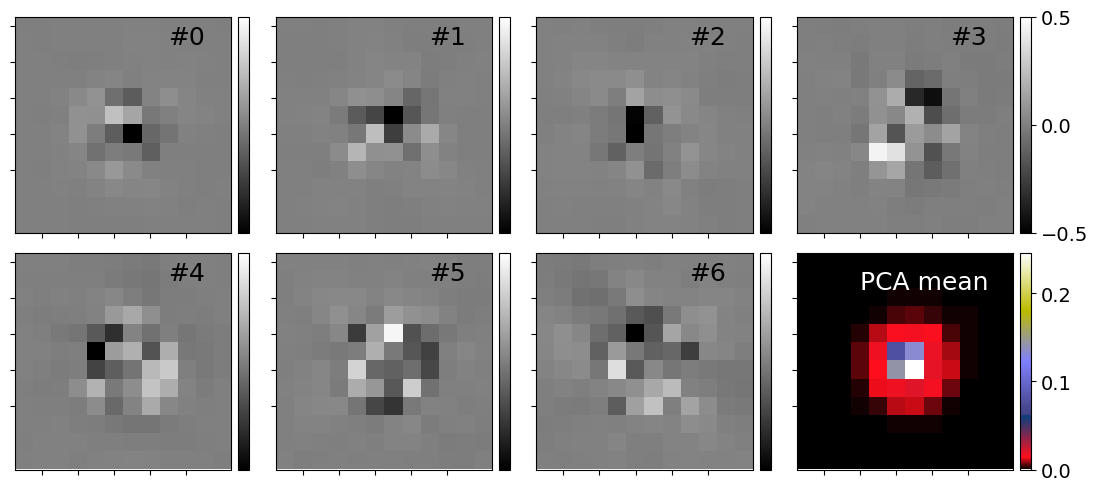

In [304]:
components_to_plot = 8
# fontsize
plt.rc('font', size=14)          # controls default text sizes


plt.subplots(components_to_plot//4,4, figsize=(11,components_to_plot*.6), constrained_layout=True)
for i in range(components_to_plot):
    plt.subplot(components_to_plot//4,4,i+1)
    if i==7:
        plt.imshow(pca.mean_.reshape(32,32)[10:-10,10:-10], cmap='gist_stern')
        plt.annotate('PCA mean', (0,0), (3, 1.5), fontsize=18, color='white')
        cbar = plt.colorbar(fraction=0.047, pad=0.03)
        cbar.set_ticks([0, .1, .2])

    elif i==3:
        plt.imshow((pca.components_[i]).reshape(32,32)[10:-10,10:-10], cmap='gray', vmin=-.5, vmax=.5)
        plt.annotate('#'+str(i), (0,0), (8, 1), fontsize=18 )
        cbar = plt.colorbar(fraction=0.047, pad=0.03)
        cbar.set_ticks([-0.5, 0, 0.5])
    else:
        plt.imshow((pca.components_[i]).reshape(32,32)[10:-10,10:-10], cmap='gray', vmin=-.5, vmax=.5)
        plt.annotate('#'+str(i), (0,0), (8, 1), fontsize=18 )
        cbar = plt.colorbar(fraction=0.047, pad=0.03)
        cbar.set_ticks([])
    

        

    # plt.colorbar()
    plt.xticks([1,3,5,7,9], ['', '', '', '', ''])
    plt.yticks([0,2,4,6,8], ['', '', '', '', ''])
    
# plt.tight_layout()

plt.savefig('PCA_components.pdf', bbox_inches='tight')


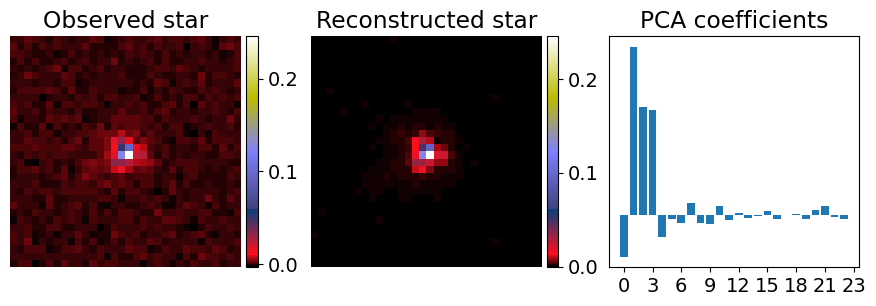

In [305]:
star_example = noisy_train_stars[10]
star_components = pca.transform(star_example.reshape(-1, 1024))
star_reconstructed = pca.inverse_transform(star_components)

plt.figure(figsize=(11,3))

plt.subplot(1,3,1)
plt.imshow(star_example.reshape(32,32), cmap='gist_stern')
plt.axis('off')
plt.title('Observed star')
cbar = plt.colorbar(fraction=0.046, pad=0.02)
cbar.set_ticks([0,0.1,0.2])

plt.subplot(1,3,2)
plt.imshow(star_reconstructed.reshape(32,32), cmap='gist_stern')
plt.axis('off')
cbar = plt.colorbar(fraction=0.046, pad=0.02)
cbar.set_ticks([0,0.1,0.2])
plt.title('Reconstructed star')

plt.subplot(1,3,3)
plt.bar(range(N_components), star_components[0])
plt.title('PCA coefficients')
plt.xticks(list(range(0,N_components,3))+[24], list(range(0,N_components,3))+[23])
plt.yticks([])
# plt.tight_layout()
# plt.show()

plt.savefig('PCA_reconstruction.pdf', bbox_inches='tight')



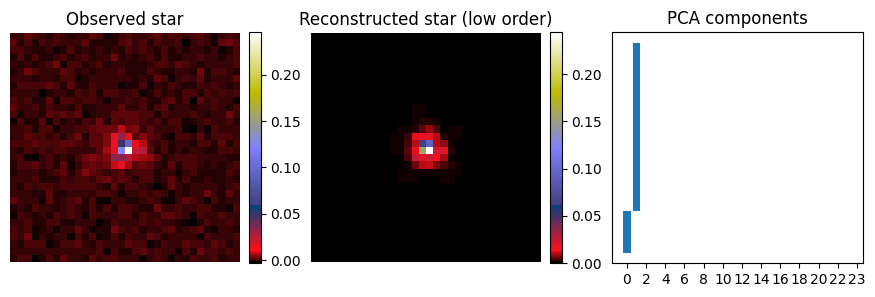

In [271]:
max_components_low_order = 2
star_example = noisy_train_stars[10]
star_components_loworder = pca.transform(star_example.reshape(-1, 1024))
star_components_loworder[:,max_components_low_order:] = 0
star_reconstructed_loworder = pca.inverse_transform(star_components_loworder)

plt.figure(figsize=(11,3))

plt.subplot(1,3,1)
plt.imshow(star_example.reshape(32,32), cmap='gist_stern')
plt.axis('off')
plt.title('Observed star')
# colorbar with size of subplot
plt.colorbar(fraction=0.046, pad=0.04)


plt.subplot(1,3,2)
plt.imshow(star_reconstructed_loworder.reshape(32,32), cmap='gist_stern')
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Reconstructed star (low order)')

plt.subplot(1,3,3)
plt.bar(range(N_components), star_components_loworder[0])
plt.title('PCA components')
plt.xticks(list(range(0,N_components,2))+[24], list(range(0,N_components,2))+[23])
plt.yticks([])
# plt.tight_layout()
# plt.show()

# plt.savefig('PCA_reconstruction.pdf', bbox_inches='tight')